In [1]:
import scanpy as sc
import os
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [33]:
data_path = '/Users/jiehoonk/DevHub/mnt/dataset/lgg/output'
!ls {data_path}

1qc.h5ad
adj.csv
annotated.h5ad
annotated_with_cnvs.h5ad
copykat_result_copykat_CNA_raw_results_gene_by_cell.txt
copykat_result_copykat_CNA_results.txt
copykat_result_copykat_prediction.txt
copykat_result_copykat_with_genes_heatmap.pdf
filtered.loom
integrated.h5ad
model.model
reg.csv
scenic_out.loom


In [71]:
adata = sc.read_h5ad(os.path.join(data_path, 'annotated.h5ad'))
adata

AnnData object with n_obs × n_vars = 21172 × 33697
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'scDblFinder_score', 'scDblFinder_class', 'sample_description', '_scvi_batch', '_scvi_labels', 'over', 'jw_diagnosis', 'jw_anno', 'ct_anno', 'ct_conf_score', 'GFP', 'leiden_res3', 'tumor_score', '_scvi_raw_norm_scaling', 'Astro-like_score', 'Astrocytes_score', 'Cycling_score', 'Endothelial_score', 'Gradient_score', 'Microglia_score', 'Mixed_score', 'Neurons_score', 'Oligodendrocytes_score', 'OPC-like_score', 'Pericytes_score', 'RE_score', 'T Cell_score', 'cell_type'
    uns: 'GFP_colors', '_scvi_manager_uuid', '_scvi_uuid', 'cell_type_colors', 'dea_leiden_res3', 'dendrogram_leiden_res3', 'jw_anno_colors', 'leiden', 'leiden_res3_colors', 'neighbors', 'over_colors', 'rank_genes_groups', 'sample_id_colors', 'umap'
    obsm: 'X_pca', 'X_scVI

In [35]:
marker_genes = {
    "OL marker" : ["Mbp", "Mog", "Cnp"],
    "Microglia marker" : ["Tmem119", "Cx3cr1", "Trem2"],
    "OPC marker" : ["Pdgfra", "Cspg4", "Sox10"],
    "Astrocyte marker" : ["Aqp4", "Slc39a12", "Acsbg1"],
    "Neuron marker" : ["Rbfox3", "Syp", "Synpr"],
    "Ependymal cell marker" : ["Calml4", "Foxj1", "Pifo"],
    "Endotheilal cell marker" : ["Cd34", "Vwf", "Ly6a"],
    "NSC marker" : ["Nes", "Vim", "Sox2"],
    "COP marker" : ["Myrf", "Nkx2-2", "Gpr17"],
    "Tumor cell lineage marker" : ["Cas9-EGFP"],
}

- 이렇게 order해주면 됩니다!

In [76]:
ordered_cell = [
    'NSC', 'OPC', 'COP', 'Oligodendrocyte', 'Astrocyte', 'Neuron', 'Ependymal_cell', 'Endothelial_cell', 'Pericyte', 'Microglia', 'T-cell', 'OPC-like', 'Tumor'
]
adata.obs['cell_type'] = pd.Categorical(values = adata.obs['cell_type'], categories = ordered_cell, ordered = True)

/Users/jiehoonk/micromamba/envs/sc/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


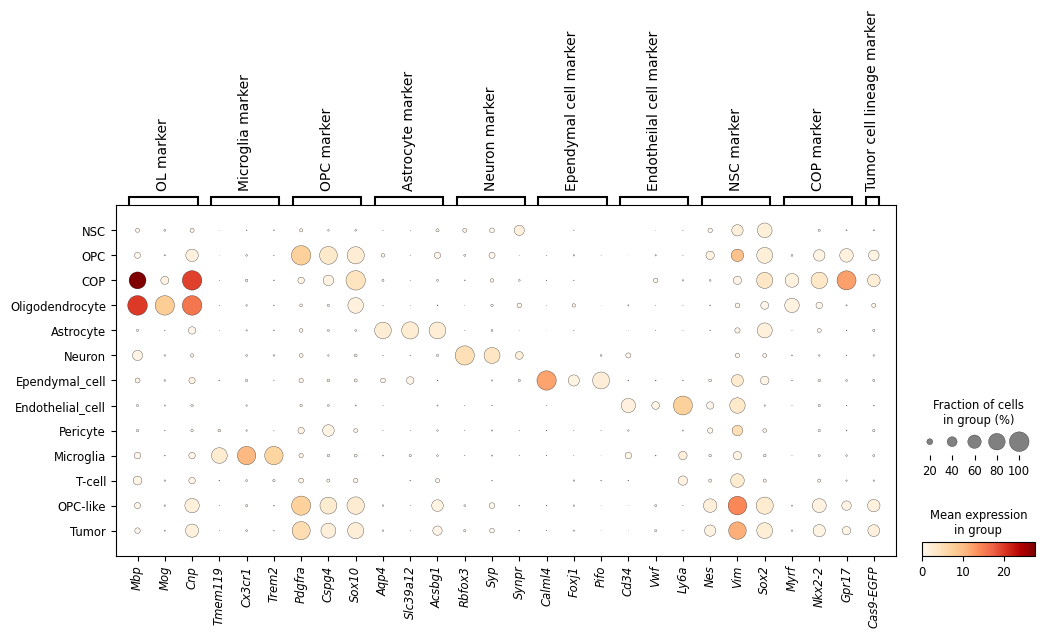

In [77]:
dp_cellmarker = sc.pl.dotplot(adata, marker_genes, groupby="cell_type", show = False, cmap='OrRd')
ax = dp_cellmarker["mainplot_ax"]
for l in ax.get_xticklabels():
    l.set_style("italic")

In [50]:
adata.obs.cell_type

AAACCCAAGTCACGCC-1              Tumor
AAACCCACAATCGCAT-1           OPC-like
AAACCCAGTGCACGCT-1              Tumor
AAACCCATCGGCTGAC-1              Tumor
AAACGAAAGTAACCGG-1           OPC-like
                           ...       
TTTGGTTAGCTAGAGC-1    Oligodendrocyte
TTTGGTTAGGTAGATT-1    Oligodendrocyte
TTTGGTTGTTTCACTT-1    Oligodendrocyte
TTTGGTTTCCACGTAA-1    Oligodendrocyte
TTTGTTGTCATGTCTT-1                OPC
Name: cell_type, Length: 21172, dtype: category
Categories (13, object): ['NSC' < 'OPC' < 'COP' < 'Oligodendrocyte' ... 'Microglia' < 'T-cell' < 'OPC-like' < 'Tumor']